In [1]:
import numpy as np 
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
suburbs = []
subs = open('areas.txt', 'r')
for line in subs:
    line = line.replace('(', '')
    line = line.replace(')', '')
    line = line.strip()
    suburbs.append(line)
subs.close
print(suburbs)

['Aadhar Hospital, Satav nagar , Handewadi road, Hadapsar, Pune', 'Aadhar Multispeciality Hospital, Narhe Pune', 'Anmol Multispeciality Clinic Hospital', 'Annasaheb Magar Hospital', 'ANUJA HOSPITAL', 'Anup Hospital', 'Apollo Manjari Multispecilty Hospital', 'Asian Speciality Hospital', 'Athang Multispecialty Clinic', 'AVAN Multispeciality Hospital', 'Bharati Hospital', 'Bhujbal Hospital', 'Borikar Hospital', 'Care Hospital Multispeciality', 'Chaitanya Hospital', 'Chandralok Hospital', 'CHAVAN MULTISPECIALITY HOSPITAL', 'City Care Hospital', 'City Hospital', 'Deoyani Multi Speciality Hospital', 'Dhankawade Hospital', 'Dhanwantari Hospital', 'Dr. Masal Hospital', 'Dr. Patil Hospital', 'Gawali Hospital', 'Global Health Care Hospital', 'H3 HOSPITALMultispeciality Hospital bhekrai nagarPune', 'Harpale Hospital', 'HINGANE Pmc Hospital', 'Jagtap Hospital', 'jalore hospital', 'Jeevan Uday Multispeciality Hospital', 'Joshi Hospital', 'JS HOSPITAL', 'Kalpataru Hospital, Undri. Day care', 'Kamal 

In [6]:
filenames = []
for i in range(0, len(suburbs)):
  filenames.append("./Reviews/"+str(suburbs[i])+"/reviews.csv")
  # filenames = [
  #             "./Reviews/ANUJA HOSPITAL/reviews.csv",
  #           ]

# merging two csv files
df = pd.concat(
    map(pd.read_csv, filenames), ignore_index=True)

print(len(df))
df

8620


,Rating,Review
0,5 stars,Such a great experience. Very friendly staff a...
1,5 stars,We visited the Dental dept. Managed by Dr. Apu...
2,5 stars,Deeply appreciate Doctor and all the staff`s w...
3,5 stars,We had a good experience of Aadhar Hospital. D...
4,5 stars,I was trying to conceive baby from last 3 yrs ...
...,...,...
8615,5 stars,None
8616,5 stars,None
8617,5 stars,None
8618,5 stars,None


In [7]:
review_remove_translated = []

reviews_dict = df.to_dict('list')

for review in reviews_dict['Review']:
  review_sep = str(review).split("(Translated by Google) ")
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
  
  review_remove_translated.append(review)

In [8]:
reviews_dict['Review'] = review_remove_translated
df = pd.DataFrame(reviews_dict)
df

,Rating,Review
0,5 stars,Such a great experience. Very friendly staff a...
1,5 stars,We visited the Dental dept. Managed by Dr. Apu...
2,5 stars,Deeply appreciate Doctor and all the staff`s w...
3,5 stars,We had a good experience of Aadhar Hospital. D...
4,5 stars,I was trying to conceive baby from last 3 yrs ...
...,...,...
8615,5 stars,None
8616,5 stars,None
8617,5 stars,None
8618,5 stars,None


In [9]:
import string
import re

In [10]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['Review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['Rating'].map({"1 star":0, "2 stars":0, "3 stars":0, "4 stars":1, "5 stars":1})

In [11]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_review,label,review_len,punct
0,5 stars,Such a great experience. Very friendly staff a...,such a great experience very friendly staff a...,1,190,3.2
1,5 stars,We visited the Dental dept. Managed by Dr. Apu...,we visited the dental dept managed by dr apu...,1,261,8.8
2,5 stars,Deeply appreciate Doctor and all the staff`s w...,deeply appreciate doctor and all the staff s w...,1,280,2.5
3,5 stars,We had a good experience of Aadhar Hospital. D...,we had a good experience of aadhar hospital d...,1,128,4.7
4,5 stars,I was trying to conceive baby from last 3 yrs ...,i was trying to conceive baby from last yrs ...,1,290,1.0
...,...,...,...,...,...,...
8615,5 stars,None,none,1,4,0.0
8616,5 stars,None,none,1,4,0.0
8617,5 stars,None,none,1,4,0.0
8618,5 stars,None,none,1,4,0.0


In [12]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens
0,5 stars,Such a great experience. Very friendly staff a...,such a great experience very friendly staff a...,1,190,3.2,"[such, a, great, experience, very, friendly, s..."
1,5 stars,We visited the Dental dept. Managed by Dr. Apu...,we visited the dental dept managed by dr apu...,1,261,8.8,"[we, visited, the, dental, dept, managed, by, ..."
2,5 stars,Deeply appreciate Doctor and all the staff`s w...,deeply appreciate doctor and all the staff s w...,1,280,2.5,"[deeply, appreciate, doctor, and, all, the, st..."
3,5 stars,We had a good experience of Aadhar Hospital. D...,we had a good experience of aadhar hospital d...,1,128,4.7,"[we, had, a, good, experience, of, aadhar, hos..."
4,5 stars,I was trying to conceive baby from last 3 yrs ...,i was trying to conceive baby from last yrs ...,1,290,1.0,"[i, was, trying, to, conceive, baby, from, las..."


In [13]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [14]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5 stars,Such a great experience. Very friendly staff a...,such a great experience very friendly staff a...,1,190,3.2,"[such, a, great, experience, very, friendly, s...",great experience friendly staff compassionate ...
1,5 stars,We visited the Dental dept. Managed by Dr. Apu...,we visited the dental dept managed by dr apu...,1,261,8.8,"[we, visited, the, dental, dept, managed, by, ...",visited dental dept managed dr apurva mahajan ...
2,5 stars,Deeply appreciate Doctor and all the staff`s w...,deeply appreciate doctor and all the staff s w...,1,280,2.5,"[deeply, appreciate, doctor, and, all, the, st...",deeply appreciate doctor staff took care impor...
3,5 stars,We had a good experience of Aadhar Hospital. D...,we had a good experience of aadhar hospital d...,1,128,4.7,"[we, had, a, good, experience, of, aadhar, hos...",good experience aadhar hospital dr suvarna pat...
4,5 stars,I was trying to conceive baby from last 3 yrs ...,i was trying to conceive baby from last yrs ...,1,290,1.0,"[i, was, trying, to, conceive, baby, from, las...",trying conceive baby last yr treatment differe...


In [15]:
#  Exploratory data analysis
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")

Input data has 8620 rows and 8 columns


Number of null in label: 0
Number of null in text: 0


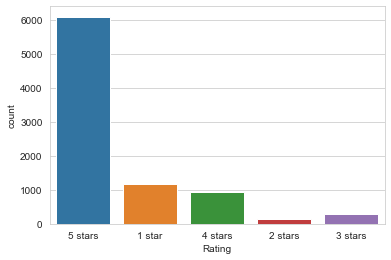

In [16]:
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

In [17]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(8620, 3)
(8620,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6034, 3)
(2586, 3)
(6034,)
(2586,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089
0,134,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.79      0.47      0.59       470
           1       0.89      0.97      0.93      2116

    accuracy                           0.88      2586
   macro avg       0.84      0.72      0.76      2586
weighted avg       0.87      0.88      0.87      2586



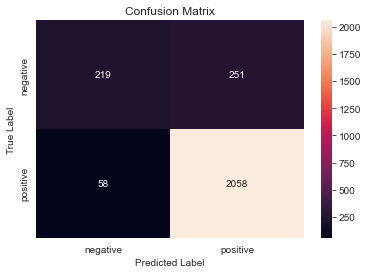

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.48      0.65       234
           1       0.88      1.00      0.94       919

    accuracy                           0.89      1153
   macro avg       0.93      0.74      0.79      1153
weighted avg       0.90      0.89      0.88      1153



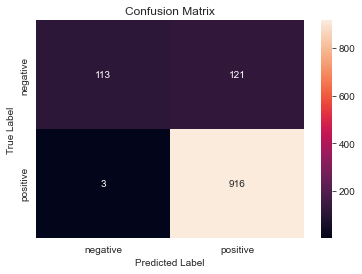

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.58      0.71       234
           1       0.90      0.99      0.94       919

    accuracy                           0.91      1153
   macro avg       0.91      0.78      0.83      1153
weighted avg       0.91      0.91      0.90      1153



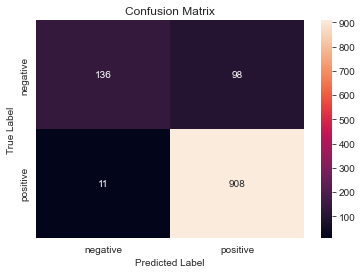

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.43      0.08      0.13       234
           1       0.81      0.97      0.88       919

    accuracy                           0.79      1153
   macro avg       0.62      0.53      0.51      1153
weighted avg       0.73      0.79      0.73      1153



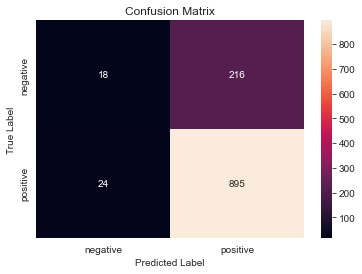

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9168600154679041

In [26]:
# data = ["Bad", "Good", "I love the service, it's really good", "Worst"]
# vect = tfidf.transform(data).toarray()

# my_pred = classifier.predict(vect)
# print(my_pred)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [28]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)


0.9048723897911833

In [29]:
data = ["Bad", "Worst service, don't go there", "Services are OK", "Good service", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 0 1 1 1]


In [30]:
import sys

In [31]:
pointer = open("./Reviews/Sancheti Hospital/reviews.csv", "r")
txt = pointer.read()
service = []
#print(txt)

def find_services(txt, services):
    ortho = re.search("[a-z].*[oO]rtho*", txt)
    pedia = re.search("[a-z].*[pP]edia*", txt)
    cardio = re.search("[a-z].*[cC]ardio*", txt)
    derma = re.search("[a-z].*[dD]erma*", txt)
    endo = re.search("[a-z].*[eE]ndo*", txt)
    gastro = re.search("[a-z].*[gG]astro*", txt)
    nephro = re.search("[a-z].*[nN]ephro*", txt)
    neuro = re.search("[a-z].*[nN]euro*", txt)
    onco = re.search("[a-z].*[oO]nco*", txt)
    optha = re.search("[a-z].*[oO]ptha*", txt)
    vaccine = re.search("[a-z].*[vV]accin*", txt)

    if ortho:
        services.append("orthopedic")
    if pedia:
        services.append("pediatric")
    if cardio:
        services.append("cardiology")
    if derma:
        services.append("dermatology")
    if endo:
        services.append("endocrinology")
    if gastro:
        services.append("gastrology")
    if nephro:
        services.append("nephrology")
    if neuro:
        services.append("neurology")
    if onco:
        services.append("oncology")
    if optha:
        services.append("opthalogy")
    if vaccine:
        services.append("vaccination")

    return services

services = find_services(txt, service)
print(services)

pointer.close()

['orthopedic', 'pediatric', 'endocrinology', 'oncology']


In [32]:
#18.4491376
#73.8760855

#18.4488142 - katraj
#73.8583736
lat = float(input("Enter your latitude: "))
lon = float(input("Enter your longitude: "))

ran = float(input("Enter the range(in km): "))
speciality = input("Enter the speciality you are in search for")

Hospitals = {}
specialist = {}

def recommend_hospital():

        change_per_deg_lat = 111.2
        change_per_deg_long = 105.75

        df = pd.read_csv("modified.csv")

        for row in df.itertuples():

                x = abs(float(row[6]) - lon) * change_per_deg_long
                y = abs(float(row[5]) - lat) * change_per_deg_lat
                dist = (x**2 + y**2)**(1/2)

                if dist <= ran:
                        #print(row[1])

                        if row[1] not in suburbs:
                                continue
                        process = read_csv("./Reviews/"+str(row[1])+"/reviews.csv")
                        pointer = open("./Reviews/"+str(row[1])+"/reviews.csv", "r")
                        txt = pointer.read()
                        service = []

                        services = find_services(txt, service)
                        data = process['Review'].to_list()
                        vect = cv.transform(data).toarray()

                        my_prediction = clf.predict(vect)
                        flag = "Bad"
                        good_reviews = np.count_nonzero(my_prediction) / len(my_prediction)
                        Hospitals[str(row[1])] = good_reviews

                        if speciality in services:
                                specialist[str(row[1])] = speciality
                        
                        
                        # print(good_reviews)
                        # print(np.count_nonzero(my_prediction))
                        # print(speciality)
                        
                        if good_reviews > 0.5:
                                flag = "Good"
                        if (good_reviews > 0.75) & (len(my_prediction) > 100):
                                flag = "Excellent"
                        if good_reviews <= 0.5:
                                flag = "Not good"
                        # print(my_prediction)
                        
                        sys.stdout.write("\033[1;35m")
                        if flag == "Good":
                                if speciality in services:
                                        sys.stdout.write("\033[1;32m")
                                        print("\n"+str(row[1])+" is a",flag,"hospital for",speciality)
                        elif flag == "Excellent":
                                if speciality in services:
                                        print("\nWe recommend "+str(row[1])+" for",speciality,",it is an",flag,"hospital")
                        sys.stdout.write("\033[1;33m")
                        if speciality in services:
                                print("Here, the specialities offered are ")
                                print(services)

                        sys.stdout.write("\033[0;0m")

recommend_hospital()



We recommend Sai Sneh Hospital and Diagnostic Center for oncology ,it is an Excellent hospital
Here, the specialities offered are 
['cardiology', 'endocrinology', 'oncology']

Bharati Hospital is a Good hospital for oncology
Here, the specialities offered are 
['orthopedic', 'pediatric', 'dermatology', 'endocrinology', 'gastrology', 'neurology', 'oncology', 'vaccination']

We recommend Samarth Nursing Home for oncology ,it is an Excellent hospital
Here, the specialities offered are 
['endocrinology', 'oncology']

We recommend Pawar Multispeciality Hospital & Diagnostic Centre Pvt Ltd for oncology ,it is an Excellent hospital
Here, the specialities offered are 
['orthopedic', 'pediatric', 'cardiology', 'endocrinology', 'gastrology', 'oncology']


In [32]:
process = read_csv("./Reviews/Sancheti Hospital/reviews.csv")
data = process['Review'].to_list()
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
flag = "Bad"
zeroes = len(my_prediction) - np.count_nonzero(my_prediction)
if np.count_nonzero(my_prediction) > zeroes:
    flag = "Good"
# print(my_prediction)
# print(zeroes)
# print(np.count_nonzero(my_prediction))
print(flag)

Good
